# Выбор локации для скважины 

# Этапы работы

[1. Подготовка данных](#step1)
- [знакомство с данными](#step1.1)
- [подготовка данных](#step1.2)

[2. Обучение и проверка модели для каждого региона](#step2)
- [Регион 1](#step2.1)
- [Регион 2](#step2.2)
- [Регион 3](#step2.3)
- [Анализ результатов](#step2.4)

[3. Подготовка к расчету прибыли](#step3)
- [Расчет достаточного объёма сырья для безубыточной разработки новой скважин](#step3.1)
- [Анализ результатов и вывод](#step3.2)

[4. Расчёт прибыли по выбранным скважинам и предсказаниям модели( функция)](#step4)

[5. Риски и прибыль по регионам](#step5)
- [Регион 1](#step5.1)
- [Регион 2](#step5.2)
- [Регион 3](#step5.3)
- [Анализ результатов и общий вывод](#step5.4)

# Шаг 1. Загрузка и подготовка данных <a id='step1'></a>

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Знакомство с данными <a id='step1.1'></a>

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv') #регион 1
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv') #регион 2
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv') #регион 3

Так как мы не знаем, что означают признаки, то проверить данные на логику и выбросы проблематично. Но все-таки сделаем общий взгляд на данные, проверим на пропуски, мультиколлинеарность.

**Общее описание:**

In [3]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [4]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [5]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Стандартные отклонения признаков отличаются не на порядок, есть ли смысл масштабировать данные после деления на обучающую и валидационную выборки, можно в параметрах модели указать normilize=True.

In [6]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Ни в одной таблице нет пропусков, тип значений признаков и целевого признака - числовой. Столбец id в обучении использовать не будем.

Проверим признаки на мультиколлинеарность:

In [9]:
def corrspearman(data):
    parameters = data
    plt.figure(figsize = (5,5))
    sns.heatmap(parameters.corr(method='spearman'),annot=True)

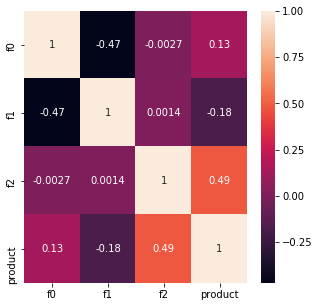

In [10]:
corrspearman(geo_data_0)

В первом регионе очень сильной корреляции между признаками не обнаружено.

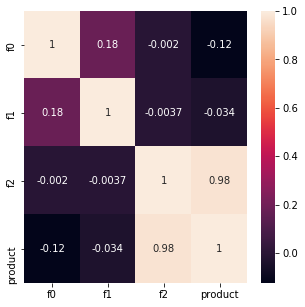

In [11]:
corrspearman(geo_data_1)

Во втором регионе сильной корреляции между признаками не обнаружено. 
Только между признаком f2 и целевым признаком product очень сильная прямая зависимость, даже подозрительно сильная.

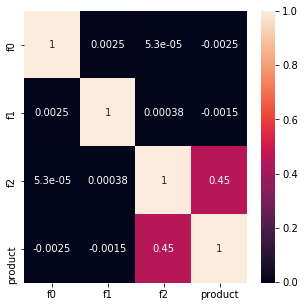

In [12]:
corrspearman(geo_data_2)

В третьем регионе сильной корреляции между признаками не обнаружено.

## Подготовка данных <a id='step1.2'></a>

Удалим ненужные столбцы

In [13]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

# Шаг 2. Обучение и проверка модели <a id='step2'></a>

Поделим выборки на обучающие и валидационные в соотношении 75:25, и на features и target:

In [14]:
def division(data):
    data_train, data_valid = train_test_split(data, test_size=0.25, random_state=12345)
    features_train = data_train.drop(['product'], axis=1)
    target_train = data_train['product']
    features_valid = data_valid.drop(['product'], axis=1)
    target_valid = data_valid['product']
    return features_train, target_train, features_valid, target_valid

In [15]:
#регион 1
features0_train, target0_train, features0_valid, target0_valid = division(geo_data_0)
#регион 2
features1_train, target1_train, features1_valid, target1_valid = division(geo_data_1)
#регион 3
features2_train, target2_train, features2_valid, target2_valid = division(geo_data_2)

По условиям задачи необходимо использовать линейную регрессию.

In [16]:
def fit_predict(features_train,target_train,features_valid):
    model = LinearRegression(normalize=True)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    return predicted_valid
    

## Регион 1: <a id='step2.1'></a>

Средний запас предсказанного сырья:

In [17]:
#предсказания в регионе 1
predicted0_valid = fit_predict(features0_train,target0_train,features0_valid) 
#средний запас сырья в каждой сквжажине в регионе 1
predicted_oil_reserve_0= predicted0_valid.mean()
predicted_oil_reserve_0

92.59256778438035

In [18]:
#фактический средний запас сырья в скважине
actual_oil_reserve_0 = target0_valid.mean()
actual_oil_reserve_0

92.07859674082927

RMSE модели в регионе 1:

In [19]:
mse0 = mean_squared_error(target0_valid, predicted0_valid)
rmse0 = mse0**0.5
rmse0

37.5794217150813

In [20]:
#проверка модели на адекватность
predictions = pd.Series(target0_train.mean(), index=target0_valid.index)
mse = mean_squared_error(target0_valid, predictions)
rmse = mse**0.5
rmse

44.289591053907365

## Регион 2: <a id='step2.2'></a>

Средний запас предсказанного сырья:

In [21]:
#предсказания в регионе 2
predicted1_valid = fit_predict(features1_train,target1_train,features1_valid)
#средний запас сырья в каждой сквжажине в регионе 2
predicted_oil_reserve_1 = predicted1_valid.mean()
predicted_oil_reserve_1

68.728546895446

In [22]:
#фактический средний запас сырья в скважине
actual_oil_reserve_1=target1_valid.mean()
actual_oil_reserve_1

68.72313602435997

RMSE модели в регионе 2:

In [23]:
mse1 = mean_squared_error(target1_valid, predicted1_valid)
rmse1 = mse1**0.5
rmse1

0.8930992867756157

In [24]:
#проверка модели на адекватность
predictions = pd.Series(target1_train.mean(), index=target1_valid.index)
mse = mean_squared_error(target1_valid, predictions)
rmse = mse**0.5
rmse

46.02144533725462

## Регион 3: <a id='step2.3'></a>

Средний запас предсказанного сырья:

In [25]:
#предсказания в регионе 3
predicted2_valid = fit_predict(features2_train,target2_train,features2_valid)
#средний предсказанный запас сырья в каждой сквжажине в регионе 3
predicted_oil_reserve_2 = predicted2_valid.mean()
predicted_oil_reserve_2

94.96504596800489

In [26]:
#фактический средний запас сырья в скважине
actual_oil_reserve_2= target2_valid.mean()
actual_oil_reserve_2

94.88423280885438

RMSE модели в регионе 3:

In [27]:
mse2 = mean_squared_error(target2_valid, predicted2_valid)
rmse2 = mse2**0.5
rmse2

40.02970873393434

In [28]:
#проверка модели на адекватность
predictions = pd.Series(target2_train.mean(), index=target2_valid.index)
mse = mean_squared_error(target2_valid, predictions)
rmse = mse**0.5
rmse

44.90234968510566

## Анализ результатов <a id='step2.4'></a>
Самую простейшую проверку на адекватность модели в каждом регионе прошли - они предсказывают лучше, чем просто предсказание средним.

Также на первый взгляд в регионе 3 в среднем на каждую скважину самый большой запас сырья, но при этом самое большое значение среднеквадратической ошибки, при неправльном предсказании есть вероятность понести убытки, в регионе 2 - самый низкий средний запас сырья на скважину. Но не смотря на это модель в регионе 2 имеет очень низкий показатель средней квадратической ошибки, то есть модель предсказывает достаточно точно. 

Какой регион самый прибыльный, но в то же время с приемлемым уровнем риска для бизнеса нужно будет оценить на следующих шагах проекта.

# Шаг 3. Подготовка к расчёту прибыли <a id='step3'></a>

## Расчет достаточного объёма сырья для безубыточной разработки новой скважин <a id='step3.1'></a>

Обозначим следующеие моменты для нашей задачи:
- расчеты показателей для бизнеса (доход, прибыль и пр.) - в тыс.руб.
- Бюджет на разработку скважин в регионе — 10 млрд рублей - обозначим **budget**
- Один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей - обозначим **barrel_cost**
- Количество скважин для расчета прибыли - 200 - обозначим, как **count**

Точка безубыточности (точка 0): какой объем в скважине должен быть для того, того чтобы не потерпеть убытки. Для расчета точки безубыточности общий бюджет на разработку нужно поделить на количество разрабатываемых скважин, и поделить на стоимость единицы сырья.

In [29]:
budget = 10000000
barrel_cost = 450
count = 200
breakeven_point = budget/barrel_cost/count
breakeven_point

111.11111111111111

Как минимум 111,11 тыс бареллей нефти должно быть в каждой из двухсот разрабатываемых скважин. Если в скважинах будет больше запасов нефти, то компания начнет получать прибыль. При запасе 111 тыс бареллей - прибыль будет равна 0, если запас меньше - получим убытки

## Анализ результатов и вывод <a id='step3.2'></a>

Сравним полученный достаточный объем сырья со средними по регионам:

In [30]:
average_oil_reserve = pd.DataFrame(columns = ['region1', 'region2','region3','breakeven_point'])
average_oil_reserve.loc[0] = [actual_oil_reserve_0,actual_oil_reserve_1,actual_oil_reserve_2,breakeven_point]
average_oil_reserve

,region1,region2,region3,breakeven_point
0,92.078597,68.723136,94.884233,111.111111


Средний запас сырья на одну скважину ни в одном регионе не превышает достаточного объема для безубыточной разработки. Однако наверняка есть скважины, в которых уровень запаса выше минимального расчетного, разрабатывая которые компания получит прибыль. По условиям задачи мы можем произвести разведку в 500 скважинах, выбрать среди них для разработки 200 скважин с максимальным по прогнозам объемом сырья. Необходимо оценить риски и прибыль в каждом регионе - стоит ли вообще начинать разработку в регионе.

# Шаг 4. Расчёт прибыли и рисков <a id='step4'></a>

Напишем итоговую функцию, в которой применим технику Bootstrap, чтобы найти распределение прибыли. 

In [31]:
n_count = 500 #выбираем по 500 скважин
#функция для расчета прибыли
def profit(target, predict):
    probs_sorted = predict.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return barrel_cost * selected.sum() - budget

#итоговая функция, на вход предсказания и целевое значения сырья по региону
def distribution_profit(target, predict):
    state = np.random.RandomState(12345)
    values = []
    target = target.reset_index(drop=True)
    predict = pd.Series(predict)
    for i in range(1000):
        target_subsample = target.sample(n=n_count, replace=True, random_state=state)# < напишите код здесь>
        probs_subsample = predict[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample))
    return pd.Series(values)


# Шаг 5. Риски и прибыль по регионам <a id='step5'></a>

Рассчитаем среднюю прибыль, 95% доверительный интервал и риски для каждого региона:

## Регион 1: <a id='step5.1'></a>

Распределение прибыли по первому региону:

In [32]:
distribution_profit_0 = distribution_profit(target0_valid,predicted0_valid)

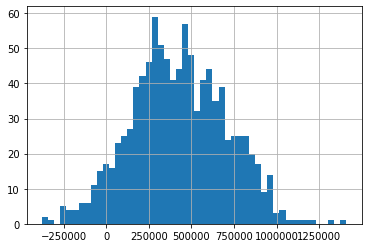

In [33]:
distribution_profit_0.hist(bins=50)

Средняя прибыль по региону (1000 выборок по 500 скважин, прибыль по 200 с максимальным предсказанным объемом сырья), тыс.руб:

In [34]:
distribution_profit_0.mean()

425938.5269105924

Доверительный интервал 95%: 

In [35]:
distribution_profit_0.quantile(0.025)

-102090.09483793723

In [36]:
distribution_profit_0.quantile(0.975)

947976.3533583689

Риск убытков:

In [37]:
distribution_profit_0[distribution_profit_0<0].count()/len(distribution_profit_0)

0.06

## Регион 2: <a id='step5.2'></a>

Распределение прибыли по второму региону:

In [38]:
distribution_profit_1 = distribution_profit(target1_valid,predicted1_valid)

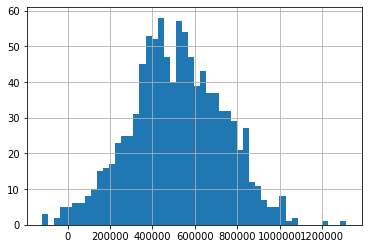

In [39]:
distribution_profit_1.hist(bins=50)

Средняя прибыль по региону (1000 выборок по 500 скважин, прибыль по 200 с максимальным предсказанным объемом сырья), тыс.руб:

In [40]:
distribution_profit_1.mean()

515222.77344329

Доверительный интервал 95%: 

In [41]:
distribution_profit_1.quantile(0.025)

68873.22537050233

In [42]:
distribution_profit_1.quantile(0.975)

931547.5912570491

Риск убытков:

In [43]:
distribution_profit_1[distribution_profit_1<0].count()/len(distribution_profit_1)

0.01

## Регион 3: <a id='step5.3'></a>

Распределение прибыли по второму региону:

In [44]:
distribution_profit_2 = distribution_profit(target2_valid,predicted2_valid)

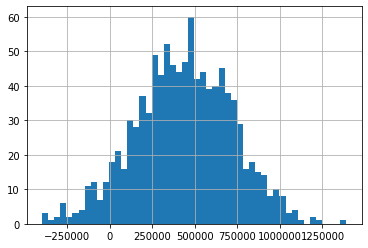

In [45]:
distribution_profit_2.hist(bins=50)

Средняя прибыль по региону (1000 выборок по 500 скважин, прибыль по 200 с максимальным предсказанным объемом сырья), тыс.руб:

In [46]:
distribution_profit_2.mean()

435008.3627827556

Доверительный интервал 95%: 

In [47]:
distribution_profit_2.quantile(0.025)

-128880.54732978888

In [48]:
distribution_profit_2.quantile(0.975)

969706.9541802683

Риск убытков:

In [49]:
distribution_profit_2[distribution_profit_2<0].count()/len(distribution_profit_2)

0.064

## Анализ результатов и общий вывод <a id='step5.4'></a>

На основании проведенного анализа для разработки предлагаем Регион 2: это единственный регион, где риск убытков менее 2,5% (это обязательное условие). В данном регионе риск убытков составляет 1%, самая высокая средняя прибыль по 1000 выборок среди трех регионов - более 515 млн.руб. Также на этапе обучения модели по второму региону показатель RMSE (среднеквадратическая ошибка - отклонение прогнозных значений от целевых) был самый низкий - то есть модель достаточно точно предсказывает объемы сырья в скважине (в этом регионе один из признаков коррелировался с целевым на 98%), поэтому вероятность, что прогнозируемая прибыль не будет отличаться сильно от фактической, а риск убытков будет минимальным - самая высокая из всех трех регионов.
В Регионах 1 и 3 - неприемлемый уровень риска получения убытков.